<h5 style = 'text-align:center;'> <b><u> Use Clustering Techniques for the any
customer dataset using machine
    learning</b></u>

 <b> Modules to import  </b>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import bokeh as bo
import seaborn as sns
from  sklearn.cluster import KMeans

<b> To import a dataset </b>

In [9]:
df = pd.read_csv("C:\\Users\\santhoshinishanmugam\\OneDrive\\Desktop\\Data Analytics\\Data Science Internship\\Mall_Customers.csv")
df.head()
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<b> How many rows and columns are there? </b>

In [10]:
df.shape

(200, 5)

<b>Dataset info </b>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<b> Preprocessing</b>

<b> Checking for null values </b>

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> Select Annual Income column and Spending Score</b>

In [13]:
a = df.iloc[:,[3,4]].values
a

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
def kmeans(a, k, max_iter = 100):
    centroids = a[np.random.choice(a.shape[0], k, replace = False), :]
    
    for iteration in range(max_iter):
        dis = np.sqrt(((a - centroids[:, np.newaxis])**2).sum(axis=2))
        cl_a = np.argmin(dis, axis=0)
        
        for cluster in range(k):
            centroids[cluster] = a[cl_a == cluster].mean(axis = 0)
        
    return centroids, cl_a

In [23]:
centroids, cl_a = kmeans(a, k=3)
print(centroids)
print(cl_a)

[[87 18]
 [86 82]
 [44 49]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


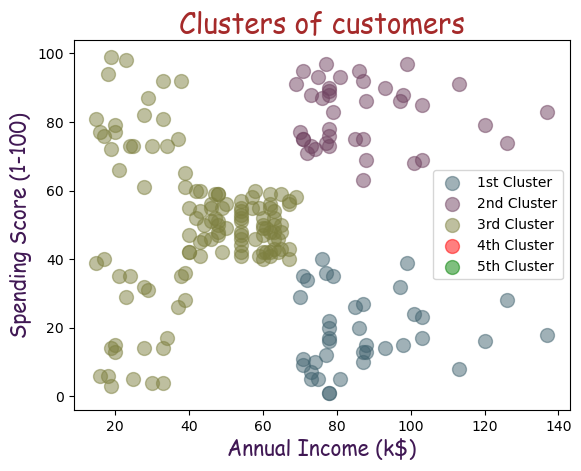

In [40]:
import matplotlib.pyplot as plt
plt.scatter(a[cl_a == 0, 0], a[cl_a == 0, 1], s = 100, c = '#436470', alpha = 0.5, label = '1st Cluster')
plt.scatter(a[cl_a == 1, 0], a[cl_a == 1, 1], s = 100, c = '#704361', alpha = 0.5, label = '2nd Cluster')
plt.scatter(a[cl_a == 2, 0], a[cl_a == 2, 1], s = 100, c = '#7e8040', alpha = 0.5, label = '3rd Cluster')
plt.scatter(a[cl_a == 3, 0], a[cl_a == 3, 1], s = 100, c = 'red', alpha = 0.5, label = '4th Cluster')
plt.scatter(a[cl_a == 4, 0], a[cl_a == 4, 1], s = 100, c = 'green', alpha = 0.5, label = '5th Cluster')
f1 = {'family':'cursive','color':'brown','size':20,}
f2 = {'family':'cursive', 'color':'#401854','size':15}
plt.title("Clusters of customers", fontdict = f1)
plt.xlabel("Annual Income (k$)", fontdict = f2)
plt.ylabel("Spending Score (1-100)", fontdict = f2)
plt.legend()
plt.show()